In [3]:
%run 0.GamesDefinitions.ipynb

BR
[38.33333333 38.33333333 38.33333333]
[1. 3. 5.]


# Статья 2019 по результату GTM2019. Нэш-торги в механизме распределения ресурса YH

In [4]:
YHBadGames = [58,59,62]
YHConsensusGames = [41,42,56]
YHGames = Games[(Games.Mechname=='yh') & (Games.GameMech=='agree') & (~Games.Game.isin(YHBadGames))]

Игры не включённые (BadGames):

* 58 - все кроме одного вообще не меняют заявки в течение 15 шагов, а один меняет с точностью 0.1
* 59,62 - два шага

In [5]:
YHData = Alldata[Alldata.Game.isin(YHGames.Game)].copy()
YHData.Game.unique()

array([40, 41, 42, 43, 56, 57, 60, 61, 92, 93, 94], dtype=int64)

In [6]:
YHData.shape

(978, 18)

## Добавляем столбец является ли шаг константным поведением

In [7]:
# Считает несколько секунд
cb = getCBwithEps(YHData,eps=0)
YHData = DataMarkedCB(YHData,cb,'iscb0')
cb = getCBwithEps(YHData,eps=0.51)
YHData = DataMarkedCB(YHData,cb,'iscb0.5')
cb = getCBwithEps(YHData,eps=1.01)
YHData = DataMarkedCB(YHData,cb,'iscb1')
del cb

## Nash bargaining

Fi>Fprev == Uiloc == LNI

In [8]:
YHNB = NashData_bySubjects(YHMechanism, YHData, [0,0,0])
YHData = pd.merge(YHData, YHNB, on=['Game', 'Time','GrSubject'], how='outer')
YHData.head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,Unew>Uprev,Fnew>Fprev,Fi>Fprev,Fii>Fiprev,Ui,Uloci,Unew,Uprev,Ulocnew,Ulocnew>Ulocprev
0,40,1,11,1,1,1,1.131904,0.10700,0.534884,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,1,6,1,2,9,2.129054,5.74200,52.953488,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40,1,10,1,3,25,3.551163,5.75000,61.511628,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40,2,11,1,1,1,1.142498,0.11770,0.588099,NaN,...,0.0,0.0,0.0,1.0,-0.182068,-1.0,-0.182068,-0.166445,-5.028777e-07,-1.0
4,40,2,6,1,2,9,2.122540,5.74695,52.928870,NaN,...,0.0,0.0,0.0,0.0,-0.166445,-1.0,-0.182068,-0.166445,-5.028777e-07,-1.0


## Добавляем столбец с Наилучшим ответом и гамма (вел-на шага в индикаторном поведении)

In [9]:
csvfile = ospath.join('.','YHBRdata.csv')

BRdata = pd.read_csv(csvfile,header=None)
BRdata.columns = ['Game','Time','g1','g2','g3','br1','br2','br3']

br1 = BRdata[['Game','Time','g1','br1']].copy()
br1.columns = ['Game','Time','g','br']
br1['GrSubject'] = 1
##br1.insert(br1.shape[1],'GrSubject',1)

br2 = BRdata[['Game','Time','g2','br2']].copy()
br2.columns = ['Game','Time','g','br']
br2['GrSubject'] = 2
##br2.insert(br2.shape[1],'GrSubject',2)

br3 = BRdata[['Game','Time','g3','br3']].copy()
br3.columns = ['Game','Time','g','br']
br3['GrSubject'] = 3
##br3.insert(br3.shape[1],'GrSubject',3)

BRdata=pd.concat([br1,br2,br3])

BRdata.head()

,Game,Time,g,br,GrSubject
0,40.0,2.0,0.013325,8.504692,1
1,40.0,3.0,-0.013505,8.504692,1
2,40.0,4.0,0.013325,8.504692,1
3,40.0,5.0,2.953944,39.658624,1
4,40.0,6.0,1.513113,39.658624,1


In [10]:
YHData = pd.merge(YHData, BRdata[~BRdata.Game.isin(YHBadGames)], on=['Game', 'Time','GrSubject'], how='outer')
YHData.head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,Fi>Fprev,Fii>Fiprev,Ui,Uloci,Unew,Uprev,Ulocnew,Ulocnew>Ulocprev,g,br
0,40,1,11,1,1,1,1.131904,0.10700,0.534884,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,1,6,1,2,9,2.129054,5.74200,52.953488,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40,1,10,1,3,25,3.551163,5.75000,61.511628,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40,2,11,1,1,1,1.142498,0.11770,0.588099,NaN,...,0.0,1.0,-0.182068,-1.0,-0.182068,-0.166445,-5.028777e-07,-1.0,0.013325,8.504692
4,40,2,6,1,2,9,2.122540,5.74695,52.928870,NaN,...,0.0,0.0,-0.166445,-1.0,-0.182068,-0.166445,-5.028777e-07,-1.0,0.000000,27.598804


In [27]:
c1,c2 = YHData['s2'],YHData['br']

YHData['br0'] = ((c1-c2).abs() < 0.01).astype('float64')
YHData['br0.5'] = ((c1-c2).abs() < 0.51).astype('float64')
YHData['br1'] = ((c1-c2).abs() < 1.01).astype('float64')
YHData['twbr'] = (YHData['g'] > 0).astype('float64')

In [28]:
YHData.to_csv('YH_BR_CB_NB_data_2021jun24.csv',sep=';')

In [29]:
YHData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'iscb0', 'iscb0.5',
       'iscb1', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev',
       'Ulocnew', 'Ulocnew>Ulocprev', 'g', 'br', 'br0', 'br0.5', 'br1',
       'twbr'],
      dtype='object')

In [30]:
(YHData['Uloci']>0).sum()

101

## Individual decisions

In [33]:
YHData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Util', 'iscb0', 'iscb0.5', 'iscb1',
       'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev', 'Fnew>Fprev',
       'Fi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev', 'Ulocnew',
       'Ulocnew>Ulocprev', 'g', 'br', 'br0', 'br0.5', 'br1', 'twbr'],
      dtype='object')

In [34]:
YHData.twbr.sum() 

435.0

In [35]:
individual_decisions(YHData)

{'games': 11,
 'total iterations': 315,
 'total decisions': 945,
 'Rtnl': 373,
 'Toward BR': 435,
 'BR(1)': 49,
 'Agree CB': 295,
 'Waiting CB(1)\\ACB': 120,
 'Rational WCB(1)\\ACB': 74,
 'NI': 311,
 'NI\\WCB(1)': 253,
 'Rational NI\\WCB(1)': 161,
 'Local NI': 582,
 'Local NI & NI': 188,
 'LNI\\WCB(1)': 275,
 'Rational LNI\\WCB(1)': 191,
 'LNI\\NI': 394,
 'LNI\\NI\\WCB(1)': 126,
 'LNI&LN>0': 82,
 'LNI>0\\WCB(1)': 82,
 'LNI>0\\NI': 10}

In [32]:
YHIndDecCons = individual_decisions(YHData[YHData.Game.isin(YHConsensusGames)])

YHIndDecNotCons = individual_decisions(YHData[~YHData.Game.isin(YHConsensusGames)])

YHIndDec = individual_decisions(YHData)

In [38]:
YHData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'iscb0', 'iscb0.5',
       'iscb1', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev',
       'Ulocnew', 'Ulocnew>Ulocprev', 'g', 'br', 'br0', 'br0.5', 'br1',
       'twbr'],
      dtype='object')

In [41]:
YHIndDecResult = pd.concat([pd.DataFrame.from_dict(YHIndDec,'index',columns=['All games']), pd.DataFrame.from_dict(YHIndDecNotCons,'index',columns=['NotConsensus']),
                          pd.DataFrame.from_dict(YHIndDecCons,'index',columns=['Consensus'])], axis=1 )
YHIndDecResult

,All games,NotConsensus,Consensus
games,11,8,3
total iterations,315,262,53
total decisions,945,786,159
Rtnl,373,306,67
Toward BR,435,361,74
BR(1),49,31,18
Agree CB,295,240,55
Waiting CB(1)\ACB,120,115,5
Rational WCB(1)\ACB,74,70,4
NI,311,258,53


In [42]:
YHIndDecResult.to_csv('YHNash_IndividualDecisions.csv',sep=';')

In [43]:
YHData.Game.unique()

array([40, 41, 42, 43, 56, 57, 60, 61, 92, 93, 94], dtype=int64)

## Decision situations

In [59]:
sittable = getSituationsTable(situations,YHData, YHConsensusGames)
sittable

,All games,Not Consensus,Consensus
games,11,8,3
total situations,315,262,53
One Rtnl,252,208,44
All Rtnl,18,14,4
One BR(1),44,27,17
Two BR(1),5,4,1
All BR(1),0,0,0
One TBR,273,227,46
Two TBR,133,111,22
All TBR,29,23,6


In [60]:
sittable.to_csv('YHNash_Situations.csv',sep=';')

In [61]:
nashsittable = getSituationsTable(Nash_situations, YHData, YHConsensusGames)
nashsittable

,All games,Not Consensus,Consensus
games,11,8,3
total situations,315,262,53
One NI,224,189,35
Two NI,76,62,14
All NI,11,7,4
One NI\WCB(1),187,153,34
Two NI\WCB(1),58,44,14
All NI\WCB(1),8,4,4
One Rational NI\WCB(1),128,100,28
Two Rational NI\WCB(1),28,19,9


In [62]:
nashsittable.to_csv('YHNash_NashSituations.csv',sep=';')

### Check situations

In [22]:
tlst = 0
for name, group in cons_sits:
    if ((group['Uloci>Ulocprev']==1) ).any():
        tlst += 1
tlst

32

In [93]:
tlst = 0
for name, group in sits:
    if ((group['Unew>U']==1) & (group['Ui>U']==1)).sum() >= 2:
        tlst += 1
tlst

67

In [94]:
tlst = 0
for name, group in conssits:
    if ((group['Unew>U']==1) & (group['Ui>U']==1)).sum() >= 2:
        tlst += 1
tlst

NameError: name 'conssits' is not defined

In [18]:
tmp = sits.get_group((40,1))

In [95]:
(tmp['GrSubject']==1).any()

NameError: name 'tmp' is not defined

In [96]:
(tmp['br1']==1).all()

NameError: name 'tmp' is not defined

In [113]:
gr = sits.get_group((40,4))
#print(gr)
(gr['twbr']==1).all()

KeyError: 'twbr'

# GTM2020. Нэш-торги в механизме распределения ресурса GL

In [2]:
GLBadGames = [26,36,50,70,71,106] # big penalties
GLConsensusGames = [11,12,13,14,15,26,30,33,38,48,49,51,71,72,107]
Old2013Games = [11,12,13,14,15,26,30,33,36,38]
GLGames = Games[(Games.Mechname=='gl') & (Games.GameMech=='agree') & (Games.Parametr1_alfa==1) 
                & (Games.Parametr2_beta==0.0005) & (Games.GamersCount==3) 
                & (~Games.Game.isin(GLBadGames)) & (~Games.Game.isin(Old2013Games))]

GoodConsensusGames = set(GLGames.Game) & set(GLConsensusGames)

Игры не включённые (BadGames):

* BadGames - большие штрафы за уход одного игрока в минус по ресурсу

In [7]:
GLData = Alldata[Alldata.Game.isin(GLGames.Game)].copy()
print(GLData.Game.unique())

GLData.shape

[ 48  49  51  68  69  72  83  84  85 107]


(798, 18)

In [8]:
GLData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util'],
      dtype='object')

## Добавляем столбец является ли шаг константным поведением

In [4]:
# Считает несколько секунд
cb = getCBwithEps(GLData,eps=0,dim=3)
GLData = DataMarkedCB(GLData,cb,'iscb0')
cb = getCBwithEps(GLData,eps=0.51,dim=3)
GLData = DataMarkedCB(GLData,cb,'iscb0.5')
cb = getCBwithEps(GLData,eps=1.01,dim=3)
GLData = DataMarkedCB(GLData,cb,'iscb1')
del cb

GLData

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,s3,AcceptAdvice,CalcCount,CalcAdviceCount,UseHelp,Unnamed: 16,Util,iscb0,iscb0.5,iscb1
3312,48,1,1,1,2,9.0,6.708204,0.000000,36.000000,38.300000,...,38.3,1.0,0.0,0.0,NaN,NaN,6.708204,0.0,0.0,0.0
3313,48,1,3,1,1,1.0,6.268971,0.000000,38.300000,38.300000,...,38.3,1.0,0.0,0.0,NaN,NaN,6.268971,0.0,0.0,0.0
3314,48,1,2,1,3,25.0,7.956130,0.000000,38.300000,38.300000,...,38.3,1.0,0.0,0.0,NaN,NaN,7.956130,0.0,0.0,0.0
3315,48,2,1,1,2,9.0,6.336449,0.325632,35.383333,1.000000,...,1.0,0.0,1.0,1.0,NaN,NaN,6.662082,0.0,0.0,0.0
3316,48,2,2,1,3,25.0,7.249945,-0.215506,24.483333,38.300000,...,38.3,0.0,1.0,0.0,NaN,NaN,7.034439,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,107,7,5,2,3,25.0,7.767302,0.438387,42.333333,14.190625,...,115.0,1.0,2.0,1.0,NaN,NaN,8.205689,0.0,0.0,0.0
6413,107,7,6,2,1,1.0,7.582648,-0.404193,50.530208,115.000000,...,9.4,0.0,0.0,1.0,NaN,NaN,7.178454,0.0,1.0,1.0
6414,107,8,4,2,2,9.0,5.613619,-0.033893,22.133333,22.400000,...,2.6,0.0,2.0,0.0,NaN,NaN,5.579725,1.0,1.0,1.0
6415,107,8,5,2,3,25.0,7.767302,0.438387,42.333333,14.200000,...,115.0,0.0,0.0,0.0,NaN,NaN,8.205689,0.0,1.0,1.0


## Nash bargaining

In [5]:
GLNB = NashData_bySubjects(GLMechanism, GLData, [0,0,0])
GLData = pd.merge(GLData, GLNB, on=['Game', 'Time', 'GrSubject'], how='outer')
GLData.head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,Unew>Uprev,Fnew>Fprev,Fi>Fprev,Fii>Fiprev,Ui,Uloci,Unew,Uprev,Ulocnew,Ulocnew>Ulocprev
0,48,1,1,1,2,9.0,6.708204,0.000000,36.000000,38.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48,1,3,1,1,1.0,6.268971,0.000000,38.300000,38.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48,1,2,1,3,25.0,7.956130,0.000000,38.300000,38.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48,2,1,1,2,9.0,6.336449,0.325632,35.383333,1.0,...,0.0,0.0,0.0,0.0,33.716166,-1.0,34.732348,57.758103,-0.168596,-1.0
4,48,2,2,1,3,25.0,7.249945,-0.215506,24.483333,38.3,...,0.0,0.0,0.0,0.0,58.640592,-1.0,34.732348,57.758103,-0.168596,-1.0


## Добавляем столбец с Наилучшим ответом и гамма (вел-на шага в индикаторном поведении)

In [6]:
BRdata = pd.read_csv('GLBRdata.csv')

BRdata.head()

,Game,Time,GrSubject,BR1,BR2,BR3,twdbr1,twdbr2,twdbr3
0,48,2,1,103.160400,4.769800,7.069800,1,1,1
1,48,2,2,8.283046,98.433910,8.283046,1,1,1
2,48,2,3,11.487866,9.187866,94.324265,0,0,1
3,48,3,1,104.079760,14.210120,-3.289880,1,1,1
4,48,3,2,12.607043,97.210915,5.182044,1,1,1


"twdbrj" - whether s_ij is toward i's BR, where i = GrSubject, s_i - bid of i's player

In [21]:
# csvfile = ospath.join('..','Serious games','YHBRdata.csv')

# BRdata = pd.read_csv(csvfile,header=None)
# BRdata.columns = ['Game','Time','g1','g2','g3','br1','br2','br3']

# br1 = BRdata[['Game','Time','g1','br1']].copy()
# br1.columns = ['Game','Time','g','br']
# br1['GrSubject'] = 1
# #br1.insert(br1.shape[1],'GrSubject',1)

# br2 = BRdata[['Game','Time','g2','br2']].copy()
# br2.columns = ['Game','Time','g','br']
# br2['GrSubject'] = 2
# #br2.insert(br2.shape[1],'GrSubject',2)

# br3 = BRdata[['Game','Time','g3','br3']].copy()
# br3.columns = ['Game','Time','g','br']
# br3['GrSubject'] = 3
# #br3.insert(br3.shape[1],'GrSubject',3)

# BRdata=pd.concat([br1,br2,br3])

# BRdata.head()

In [7]:
GLData = pd.merge(GLData, BRdata[BRdata.Game.isin(GLGames.Game)], on=['Game', 'Time','GrSubject'], how='outer')
GLData.head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,Unew,Uprev,Ulocnew,Ulocnew>Ulocprev,BR1,BR2,BR3,twdbr1,twdbr2,twdbr3
0,48,1,1,1,2,9.0,6.708204,0.000000,36.000000,38.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48,1,3,1,1,1.0,6.268971,0.000000,38.300000,38.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48,1,2,1,3,25.0,7.956130,0.000000,38.300000,38.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48,2,1,1,2,9.0,6.336449,0.325632,35.383333,1.0,...,34.732348,57.758103,-0.168596,-1.0,8.283046,98.433910,8.283046,1.0,1.0,1.0
4,48,2,2,1,3,25.0,7.249945,-0.215506,24.483333,38.3,...,34.732348,57.758103,-0.168596,-1.0,11.487866,9.187866,94.324265,0.0,0.0,1.0


In [8]:
c1,c2 = GLData[['s1','s2','s3']],GLData[['BR1','BR2','BR3']].rename(columns={'BR1':'s1','BR2':'s2','BR3':'s3'})

GLData['br0'] = (c1.sub(c2,fill_value=1000).abs().sum(axis=1)<0.01).astype('float64')
GLData['br0.5'] = (c1.sub(c2,fill_value=1000).abs().sum(axis=1)<0.51).astype('float64')
GLData['br1'] = (c1.sub(c2,fill_value=1000).abs().sum(axis=1)<1.01).astype('float64')

GLData

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,Ulocnew>Ulocprev,BR1,BR2,BR3,twdbr1,twdbr2,twdbr3,br0,br0.5,br1
0,48,1,1,1,2,9.0,6.708204,0.000000,36.000000,38.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,48,1,3,1,1,1.0,6.268971,0.000000,38.300000,38.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,48,1,2,1,3,25.0,7.956130,0.000000,38.300000,38.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,48,2,1,1,2,9.0,6.336449,0.325632,35.383333,1.000000,...,-1.0,8.283046,98.433910,8.283046,1.0,1.0,1.0,0.0,0.0,0.0
4,48,2,2,1,3,25.0,7.249945,-0.215506,24.483333,38.300000,...,-1.0,11.487866,9.187866,94.324265,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,107,7,5,2,3,25.0,7.767302,0.438387,42.333333,14.190625,...,1.0,34.579056,6.197806,74.223140,0.0,1.0,0.0,0.0,0.0,0.0
794,107,7,6,2,1,1.0,7.582648,-0.404193,50.530208,115.000000,...,1.0,94.430000,-1.627500,22.197500,0.0,1.0,0.0,0.0,0.0,0.0
795,107,8,4,2,2,9.0,5.613619,-0.033893,22.133333,22.400000,...,1.0,17.725761,81.943794,15.330448,0.0,0.0,1.0,0.0,0.0,0.0
796,107,8,5,2,3,25.0,7.767302,0.438387,42.333333,14.200000,...,1.0,34.595867,6.195866,74.208270,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
t = GLData[['twdbr1','twdbr2','twdbr3']].copy();
GLData['twbr'] = (t.sum(axis=1) == 3).astype('float64')

In [10]:
# export to csv
GLData.to_csv('GL_BR_CB_NB_data_2021jun22.csv',sep=';',)

In [9]:
# import from csv
GLData = pd.read_csv('GL_BR_CB_NB_data_2021jun22.csv',sep=';',)

## Individual decisions

In [48]:
GLData.columns

Index(['Unnamed: 0', 'Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type',
       'Gain', 'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'iscb0', 'iscb0.5',
       'iscb1', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev',
       'Ulocnew', 'Ulocnew>Ulocprev', 'BR1', 'BR2', 'BR3', 'twdbr1', 'twdbr2',
       'twdbr3', 'br0', 'br0.5', 'br1', 'twbr'],
      dtype='object')

In [49]:
GLData.twbr.sum() 

176.0

In [7]:
def individual_decisions(data):
    dec = data[data.Time>1]
    results = { 
        'games' : len(dec.Game.unique()),
        'total iterations' : len(dec.groupby(['Game','Time'])),
        'total decisions' : len(dec),
        
        'Rtnl' : (data['Fii>Fiprev']==1).sum(),
        'Toward BR' : (data.twbr==1).sum(),
        'BR(1)' : (data.br1==1).sum(),
        
        'Agree CB' : (data.iscb0==1).sum(),
        'Waiting CB(1)\ACB' : ((data.iscb1==1) & (data.iscb0==0)).sum(),
        'Rational WCB(1)\ACB' : ((data.twbr==1) & (data.iscb1==1) & (data.iscb0==0)).sum(),
        
        'NI' : (data['Ui>Uprev']==1).sum(),
        'NI\WCB(1)' : ((data['Ui>Uprev']==1) & (data.iscb1==0)).sum(),
        'Rational NI\WCB(1)' : ((data.twbr==1) & (data['Ui>Uprev']==1) & (data.iscb1==0)).sum(),
        
        'Local NI' : (data['Uloci']>0.00001).sum(),
        'Local NI & NI': ((data['Uloci']>0.00001) & (data['Ui>Uprev']==1) ).sum(),
        'LNI\WCB(1)' : ((data['Uloci']>0.00001) & (data.iscb1==0)).sum(),
        'LNI\\NI' : ((data['Uloci']>0.00001) & (data['Ui>Uprev']==0)).sum(),
        'LNI\\NI\\WCB(1)' : ((data['Uloci']>0.00001) & (data['Ui>Uprev']==0) & (data.iscb1==0)).sum(),
        'Rational LNI\WCB(1)' : ((data.twbr==1) & (data['Uloci']>0.00001) & (data.iscb1==0)).sum(),
        'LN>LNprev&LNI' : ((data['Uloci>Ulocprev']==1) & (data['Uloci']>0.00001)).sum(),
        'LN>LNprev\\WCB(1)' : ((data['Uloci>Ulocprev']==1) & (data['Uloci']>0.00001) & (data.iscb1==0)).sum(),
        'LN>LNprev\\NI' : ((data['Uloci>Ulocprev']==1) & (data['Uloci']>0.00001) & (data['Ui>Uprev']==0)).sum()
        }
    return results

#         'Local NI' : (data['Uloci>Ulocprev']==1).sum(),
#         'Local NI & NI': ((data['Uloci>Ulocprev']==1) & (data['Ui>Uprev']==1) ).sum(),
#         'LNI\WCB(1)' : ((data['Uloci>Ulocprev']==1) & (data.iscb1==0)).sum(),
#         'Rational LNI\WCB(1)' : ((data.twbr==1) & (data['Uloci>Ulocprev']==1) & (data.iscb1==0)).sum(),
#         'LNI\\NI' : ((data['Uloci>Ulocprev']==1) & (data['Ui>Uprev']==0)).sum(),
#         'LNI\\NI\\WCB(1)' : ((data['Uloci>Ulocprev']==1) & (data['Ui>Uprev']==0) & (data.iscb1==0)).sum(),
#         'LNI&LN>0' : ((data['Uloci>Ulocprev']==1) & (data['Uloci']>0.00001)).sum(),
#         'LNI>0\\WCB(1)' : ((data['Uloci>Ulocprev']==1) & (data['Uloci']>0.00001) & (data.iscb1==0)).sum(),
#         'LNI>0\\NI' : ((data['Uloci>Ulocprev']==1) & (data['Uloci']>0.00001) & (data['Ui>Uprev']==0)).sum()


In [21]:
individual_decisions(GLData)

{'games': 10,
 'total iterations': 256,
 'total decisions': 768,
 'Rtnl': 382,
 'Toward BR': 176,
 'BR(1)': 2,
 'Agree CB': 173,
 'Waiting CB(1)\\ACB': 55,
 'Rational WCB(1)\\ACB': 4,
 'NI': 285,
 'NI\\WCB(1)': 260,
 'Rational NI\\WCB(1)': 88,
 'Local NI': 524,
 'Local NI & NI': 199,
 'LNI\\WCB(1)': 354,
 'Rational LNI\\WCB(1)': 101,
 'LNI\\NI': 325,
 'LNI\\NI\\WCB(1)': 174,
 'LNI&LN>0': 19,
 'LNI>0\\WCB(1)': 19,
 'LNI>0\\NI': 0}

In [8]:
def getSituationsTable(statfunc,data,consensusgames):
    sit_cons = statfunc(data[data.Game.isin(consensusgames)])
    sit_notcons = statfunc(data[~data.Game.isin(consensusgames)])
    sit = statfunc(data)

    table = pd.concat([pd.DataFrame.from_dict(sit,'index',columns=['All games']), pd.DataFrame.from_dict(sit_notcons,'index',columns=['Not Consensus']),
                          pd.DataFrame.from_dict(sit_cons,'index',columns=['Consensus'])], axis=1 )
    return table


In [15]:
IndDecResult = getSituationsTable(individual_decisions,GLData, GLConsensusGames)
IndDecResult

,All games,Not Consensus,Consensus
games,10,5,5
total iterations,256,135,121
total decisions,768,405,363
Rtnl,382,205,177
Toward BR,176,86,90
BR(1),2,2,0
Agree CB,173,89,84
Waiting CB(1)\ACB,55,34,21
Rational WCB(1)\ACB,4,1,3
NI,285,154,131


In [52]:
IndDecResult.to_csv('GLNash_IndividualDecisions.csv',sep=';')

## Decision situations

In [9]:
def situations(data):
    dec = data[data.Time>1]
    sits = dec.groupby(['Game','Time'])
    results = { 
        'games' : len(dec.Game.unique()),
        'total situations' : len(sits),
        
        'One Rtnl' : sits.apply(lambda x: (x['Fii>Fiprev']==1).any()).sum(),
        'All Rtnl' : sits.apply(lambda x: (x['Fii>Fiprev']==1).all()).sum(),
        'One BR(1)' : sits.apply(lambda x: (x.br1==1).any()).sum(),
        'Two BR(1)' : sits.apply(lambda x: (x.br1==1).sum()>=2).sum(),
        'All BR(1)' : sits.apply(lambda x: (x.br1==1).all()).sum(),
        'One TBR' : sits.apply(lambda x: (x.twbr==1).any()).sum(),
        'Two TBR' : sits.apply(lambda x: (x.twbr==1).sum()>=2).sum(),
        'All TBR' : sits.apply(lambda x: (x.twbr==1).all()).sum(),
        
        'One ACB' : sits.apply(lambda x: (x.iscb0==1).any()).sum(),
        'Two ACB' : sits.apply(lambda x: (x.iscb0==1).sum()>=2).sum(),        
        'All ACB' : sits.apply(lambda x: (x.iscb0==1).all()).sum(),
        'One Waiting CB(1)' : sits.apply(lambda x: ((x.iscb1==1) ).any()).sum(),
        'Two Waiting CB(1)' : sits.apply(lambda x: ((x.iscb1==1) ).sum()>=2).sum(),
        'All Waiting CB(1)' : sits.apply(lambda x: ((x.iscb1==1) ).all()).sum(),
        'One Waiting CB(1)\ACB' : sits.apply(lambda x: ((x.iscb1==1) & (x.iscb0==0)).any()).sum(),
        'Two Waiting CB(1)\ACB' : sits.apply(lambda x: ((x.iscb1==1) & (x.iscb0==0)).sum()>=2).sum(),
        'All Waiting CB(1)\ACB' : sits.apply(lambda x: ((x.iscb1==1) & (x.iscb0==0)).all()).sum(),
        'One Rational WCB(1)\ACB' : sits.apply(lambda x: ((x.twbr==1) & (x.iscb1==1) & (x.iscb0==0)).any()).sum(),
        'Two Rational WCB(1)\ACB' : sits.apply(lambda x: ((x.twbr==1) & (x.iscb1==1) & (x.iscb0==0)).sum()>=2).sum(),
        'All Rational WCB(1)\ACB' : sits.apply(lambda x: ((x.twbr==1) & (x.iscb1==1) & (x.iscb0==0)).all()).sum(),
        }
    return results

def Nash_situations(data):
    dec = data[data.Time>1]
    sits = dec.groupby(['Game','Time'])
    results = { 
        'games' : len(dec.Game.unique()),
        'total situations' : len(sits),

        'One NI' : sits.apply(lambda x: (x['Ui>Uprev']==1).any()).sum(),
        'Two NI' : sits.apply(lambda x: (x['Ui>Uprev']==1).sum()>=2).sum(),
        'All NI' : sits.apply(lambda x: (x['Ui>Uprev']==1).all()).sum(),
        'One NI\WCB(1)' : sits.apply(lambda x: ((x['Ui>Uprev']==1) & (x.iscb1==0)).any()).sum(),
        'Two NI\WCB(1)' : sits.apply(lambda x: ((x['Ui>Uprev']==1) & (x.iscb1==0)).sum()>=2).sum(),
        'All NI\WCB(1)' : sits.apply(lambda x: ((x['Ui>Uprev']==1) & (x.iscb1==0)).all()).sum(),
        'One Rational NI\WCB(1)' : sits.apply(lambda x: ((x.twbr==1) & (x['Ui>Uprev']==1) & (x.iscb1==0)).any()).sum(),
        'Two Rational NI\WCB(1)' : sits.apply(lambda x: ((x.twbr==1) & (x['Ui>Uprev']==1) & (x.iscb1==0)).sum()>=2).sum(),
        'All Rational NI\WCB(1)' : sits.apply(lambda x: ((x.twbr==1) & (x['Ui>Uprev']==1) & (x.iscb1==0)).all()).sum(),
        
        'One Local NI' : sits.apply(lambda x: (x['Uloci']>0.00001).any()).sum(),
        'Two Local NI' : sits.apply(lambda x: (x['Uloci']>0.00001).sum()>=2).sum(),
        'All Local NI' : sits.apply(lambda x: (x['Uloci']>0.00001).all()).sum(),

        'Real NI' : sits.apply(lambda x: (x['Unew>Uprev']==1).all()).sum(),
        'Real LNI': sits.apply(lambda x: (x['Ulocnew']>0.00001).all()).sum(),
        'Real LNI & Real NI': sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['Ulocnew']>0.00001)).all()).sum(),
        'Real LNI & All LNI': sits.apply(lambda x: ((x['Ulocnew']>0.00001) & (x['Uloci']>0.00001)).all()).sum(),
        'Real LNI & All LNI & Real NI': sits.apply(lambda x: ((x['Ulocnew']>0.00001) & (x['Uloci']>0.00001) & (x['Unew>Uprev']==1)).all()).sum(),
        
        'LNI\WCB(1)' : sits.apply(lambda x:  ((x['Uloci']>0.00001) & (x.iscb1==0)).any()).sum(),
        'Rational LNI\WCB(1)' : sits.apply(lambda x:  ((x.twbr==1) & (x['Uloci']>0.00001) & (x.iscb1==0)).any()).sum(),
        "LNI\\NI" : sits.apply(lambda x:  ((x['Uloci']>0.00001) & (x['Ui>Uprev']==1)).any()).sum(),
        'LNI&LN>0' : sits.apply(lambda x:  ((x['Uloci>Ulocprev']==1) & (x['Uloci']>0.00001)).any()).sum(),
        'LNI>0\WCB(1)' : sits.apply(lambda x:  ((x['Uloci>Ulocprev']==1) & (x['Uloci']>0.00001) & (x.iscb1==0)).any()).sum()
        }
    return results

def RealNash_situations_origins(data):
    def mydiv(a,b):
        if b == 0:
            return -1
        return (a*100) // b;
    dec = data[data.Time>1]
    sits = dec.groupby(['Game','Time'])
    results = { 
        'games' : len(dec.Game.unique()),
        'total situations' : len(sits),

        'Real NI' : sits.apply(lambda x: (x['Unew>Uprev']==1).all()).sum(),
        'Real NI & no One NI' : sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['Ui>Uprev']==0)).all()).sum(),
        'Real NI & no One LNI' : sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['Uloci>Ulocprev']==0)).all()).sum(),
        'One NI vs Real NI %' : mydiv( sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['Ui>Uprev']==1)).sum()>=1).sum() ,
                                sits.apply(lambda x: ((x['Unew>Uprev']==0) & (x['Ui>Uprev']==1)).sum()>=1).sum() ),
        'Two NI vs Real NI %' : mydiv( sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['Ui>Uprev']==1)).sum()>=2).sum() ,
                                sits.apply(lambda x: ((x['Unew>Uprev']==0) & (x['Ui>Uprev']==1)).sum()>=2).sum() ),
        'All NI vs Real NI %' : mydiv( sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['Ui>Uprev']==1)).all()).sum() ,
                                sits.apply(lambda x: ((x['Unew>Uprev']==0) & (x['Ui>Uprev']==1)).all()).sum() ),
        'Real NI & All NI': sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['Ui>Uprev']==1)).all()).sum(),
        'Real NI & All LNI': sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['Uloci>Ulocprev']==1)).all()).sum(),

        'Real LNI': sits.apply(lambda x: (x['Ulocnew>Ulocprev']==1).all()).sum(),
        'Real LNI & no One LNI': sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['Uloci>Ulocprev']==0)).all()).sum(),
        'Real LNI & no One NI': sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['Ui>Uprev']==0)).all()).sum(),
        'One LNI vs Real LNI %': mydiv( sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['Uloci>Ulocprev']==1)).sum()>=1).sum(),
                                     sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==0) & (x['Uloci>Ulocprev']==1)).sum()>=1).sum() ),
        'Two LNI vs Real LNI %': mydiv( sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['Uloci>Ulocprev']==1)).sum()>=2).sum(),
                                     sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==0) & (x['Uloci>Ulocprev']==1)).sum()>=2).sum() ),
        'All LNI vs Real LNI %': mydiv( sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['Uloci>Ulocprev']==1)).all()).sum(),
                                     sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==0) & (x['Uloci>Ulocprev']==1)).all()).sum() ),
        'Real LNI & All LNI': sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['Uloci>Ulocprev']==1)).all()).sum(),
        'Real LNI & All NI': sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['Ui>Uprev']==1)).all()).sum(),

        'One TBR vs Real NI %' : mydiv( sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['twbr']==1)).sum()>=1).sum(),
                                    sits.apply(lambda x: ((x['Unew>Uprev']==0) & (x['twbr']==1)).sum()>=1).sum() ),
        'One ACB vs Real NI %' : mydiv( sits.apply(lambda x: ((x['Unew>Uprev']==1) & (x['iscb0']==1)).sum()>=1).sum(),
                                     sits.apply(lambda x: ((x['Unew>Uprev']==0) & (x['iscb0']==1)).sum()>=1).sum() ),

        'One TBR vs Real LNI %' : mydiv( sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['twbr']==1)).sum()>=1).sum(),
                                      sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==0) & (x['twbr']==1)).sum()>=1).sum() ),
        'One ACB vs Real LNI %' : mydiv( sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['iscb0']==1)).sum()>=1).sum(),
                                      sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==0) & (x['iscb0']==1)).sum()>=1).sum() ),
        
        'All LNI & All NI': sits.apply(lambda x: ((x['Uloci>Ulocprev']==1) & (x['Ui>Uprev']==1)).all()).sum(),
        'All LNI & All NI': sits.apply(lambda x: ((x['Uloci>Ulocprev']==1) & (x['Ui>Uprev']==1)).all()).sum(),
        'Real LNI & All LNI & Real NI': sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['Uloci>Ulocprev']==1) & (x['Unew>Uprev']==1)).all()).sum(),
        'Real LNI & All LNI & not Real NI': sits.apply(lambda x: ((x['Ulocnew>Ulocprev']==1) & (x['Uloci>Ulocprev']==1) & (x['Unew>Uprev']==0)).all()).sum(),

    }
    return results

In [38]:
situations(GLData)

{'games': 10,
 'total situations': 256,
 'All BR(1)': 0,
 'One BR(1)': 2,
 'All Toward BR': 4,
 'One TBR': 135,
 'All Agree CB': 4,
 'One ACB': 127,
 'All Waiting CB(1)\\ACB': 33,
 'One Waiting CB(1)\\ACB': 53,
 'All Rational WCB(1)\\ACB': 0,
 'One Rational WCB(1)\\ACB': 4}

In [55]:
sittable = getSituationsTable(situations,GLData, GLConsensusGames)
sittable

,All games,Not Consensus,Consensus
games,10,5,5
total situations,256,135,121
One Rtnl,220,117,103
All Rtnl,36,19,17
One BR(1),2,2,0
Two BR(1),0,0,0
All BR(1),0,0,0
One TBR,135,63,72
Two TBR,37,20,17
All TBR,4,3,1


In [56]:
sittable.to_csv('GLNash_Situations.csv',sep=';')

In [57]:
nashsittable = getSituationsTable(Nash_situations, GLData, GLConsensusGames)
nashsittable

,All games,Not Consensus,Consensus
games,10,5,5
total situations,256,135,121
One NI,194,101,93
Two NI,81,47,34
All NI,10,6,4
One NI\WCB(1),183,92,91
Two NI\WCB(1),72,41,31
All NI\WCB(1),5,3,2
One Rational NI\WCB(1),75,41,34
Two Rational NI\WCB(1),13,8,5


In [58]:
nashsittable.to_csv('GLNash_NashSituations.csv',sep=';')

In [34]:
nashsit2 = getSituationsTable(RealNash_situations_origins)
nashsit2

,All games,Not Consensus,Consensus
games,10,5,5
total situations,256,135,121
Real NI,117,60,57
Real NI & no One NI,1,1,0
Real NI & no One LNI,15,12,3
One NI vs Real NI %,148,140,158
Two NI vs Real NI %,478,422,580
All NI vs Real NI %,-1,-1,-1
Real NI & All NI,10,6,4
Real NI & All LNI,62,27,35


In [101]:
nashsit2.to_csv('GLNash_RealNashSituations.csv',sep=';')

### Regression

In [102]:
def dataForRegression(data):
    def builder(x):
        #print( x )
        return pd.Series([(x['Ui>Uprev']==1).sum()==1, (x['Ui>Uprev']==1).sum()==2, (x['Ui>Uprev']==1).all(),
                (x['Uloci>Ulocprev']==1).sum()==1, (x['Uloci>Ulocprev']==1).sum()==2, (x['Uloci>Ulocprev']==1).all(),
                (x['twbr']==1).sum()==1, (x['twbr']==1).sum()==2, (x['iscb0']==1).sum()==1, (x['iscb0']==1).sum()==2,
                x['Unew>Uprev'].iloc[0], x['Ulocnew>Ulocprev'].iloc[0] ])*1
    dec = data[data.Time>2]
    sits = dec.groupby(['Game','Time'])
    res = sits.apply(builder)
    res.columns = ['oneNI', 'twoNI', 'allNI', 'oneLNI', 'twoLNI', 'allLNI', 'oneTWBR', 'twoTWBR', 'oneACB', 'twoACB', 'RealNI', 'RealLNI' ]
    return res

In [104]:
rawdata = dataForRegression(GLData)
rawdata.describe()

,oneNI,twoNI,allNI,oneLNI,twoLNI,allLNI,oneTWBR,twoTWBR,oneACB,twoACB,RealNI,RealLNI
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,0.443089,0.284553,0.040650,0.073171,0.260163,0.512195,0.382114,0.126016,0.333333,0.150407,0.475610,0.491870
std,0.497763,0.452121,0.197882,0.260947,0.439618,0.500870,0.486895,0.332544,0.472366,0.358198,0.500423,0.500953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [105]:
X = rawdata.iloc[:,0:-2]
y1 = rawdata['RealNI']
y2 = rawdata['RealLNI']

In [127]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.4)

# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X1_train, y1_train)
# Make predictions using the testing set
y1_pred = regr.predict(X1_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y1_test, y1_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y1_test, y1_pred))

Coefficients: 
 [ 0.59110569  0.96647452  1.24730877 -0.19496872 -0.05729674 -0.05229652
  0.05292476  0.07882126  0.1635234   0.35468832]
Mean squared error: 0.17
Coefficient of determination: 0.31


In [153]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2)#, random_state=0)

# Create linear regression object
regr2 = linear_model.LinearRegression()
# Train the model using the training sets
regr2.fit(X2_train, y2_train)
# Make predictions using the testing set
y2_pred = regr2.predict(X2_test)
# The coefficients
print('Coefficients: \n', regr2.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y2_test, y2_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y2_test, y2_pred))

Coefficients: 
 [-0.02925053 -0.0799782  -0.24832478  0.0250185   0.20966351  0.88689629
  0.04562312  0.07027637 -0.03475439  0.01016417]
Mean squared error: 0.11
Coefficient of determination: 0.54


In [144]:
rawdata.columns

Index(['oneNI', 'twoNI', 'allNI', 'oneLNI', 'twoLNI', 'allLNI', 'oneTWBR',
       'twoTWBR', 'oneACB', 'twoACB', 'RealNI', 'RealLNI'],
      dtype='object')

### NBS and end of games

In [82]:
def Nash_endof_games(data):
    def builder(x):
        return pd.Series([(x['iscb0']==1).sum()>=2,(x['Ui>Uprev']==1).all(),(x['Ui>Uprev']==1).any(), (x['Uloci>Ulocprev']==1).all(),(x['Uloci>Ulocprev']==1).any(), 
                          (x['Unew>Uprev']==1).any(), (x['Ulocnew>Ulocprev']==1).any()]) * 1
    
    def columnagg(c):
        last_step = c.index[-1]
        t = c[c > 0]
        if t.size > 0:
            if t.size > 1 and t.index[-1] == last_step:
                return t.index[-2]
            return t.index[-1]
        return 1000
    
    dec = data[data.Time>2]
    sits = dec.groupby(['Game','Time'])
    
    results = sits.apply(builder)
    results.columns = ['Two ACB','All NI', 'One NI', 'All LNI', 'One LNI', 'Real NI', 'Real LNI']
    
    res2 = results.reset_index().set_index('Time').groupby('Game')
    
    res3 = res2.agg(columnagg)
    res3['length'] = res2.apply(lambda x: x.index[-1])
    return res3

In [83]:
tbl = Nash_endof_games(GLData)
tbl

,Two ACB,All NI,One NI,All LNI,One LNI,Real NI,Real LNI,length
Game,,,,,,,,
48,20,1000,20,19,19,20,19,21
49,27,14,27,27,27,27,27,28
51,44,19,42,44,44,41,44,45
68,34,21,39,34,37,39,34,40
69,39,26,30,35,35,27,35,40
72,23,1000,23,23,23,23,23,24
83,1000,14,19,19,19,18,19,20
84,17,1000,19,17,19,19,17,20
85,1000,6,19,18,19,19,18,20


In [84]:
tbl.to_csv('GLNash_Nash_endof_games.csv',sep=';')

In [58]:
GLData[GLData.Game.isin([83,84,85])].groupby('Game').tail(6)[['Unew>Uprev','Ui>Uprev','Ulocnew>Ulocprev','Uloci>Ulocprev']]

,Unew>Uprev,Ui>Uprev,Ulocnew>Ulocprev,Uloci>Ulocprev
648,0.0,1.0,1.0,1.0
649,0.0,1.0,1.0,1.0
650,0.0,0.0,1.0,1.0
651,1.0,1.0,1.0,1.0
652,1.0,0.0,1.0,1.0
653,1.0,1.0,1.0,1.0
708,1.0,1.0,0.0,0.0
709,1.0,0.0,0.0,1.0
710,1.0,1.0,0.0,1.0
711,1.0,0.0,1.0,1.0


# ADMM

In [2]:
ADMMGoodGames = [45, 46, 65, 67, 80, 81, 82]
ADMMData = Alldata[Alldata.Game.isin(ADMMGoodGames)]

ADMMNonConsensusGames = [65, 67, 82]
ADMMConsensusGames = [45,46,80,81]

ADMMData.shape

(477, 18)

In [3]:
ADMMMechanism = ADMMMechanismClass(game,{'beta':0.0005},
                                   lambda s,g: s, lambda s,g,m: s, lambda df: s
                                  )

In [4]:
ADMMData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util'],
      dtype='object')

## Добавляем столбец является ли шаг константным поведением

In [19]:
# Считает несколько секунд
cb = getCBwithEps(ADMMData,eps=0)
ADMMData = DataMarkedCB(ADMMData,cb,'iscb0')
cb = getCBwithEps(ADMMData,eps=0.51)
ADMMData = DataMarkedCB(ADMMData,cb,'iscb0.5')
cb = getCBwithEps(ADMMData,eps=1.01)
ADMMData = DataMarkedCB(ADMMData,cb,'iscb1')
del cb

In [20]:
ADMMData

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,s3,AcceptAdvice,CalcCount,CalcAdviceCount,UseHelp,Unnamed: 16,Util,iscb0,iscb0.5,iscb1
3053,45,1,6,2,1,1,6.262846,0.006125,38.3,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,6.268971,0.0,0.0,0.0
3052,45,1,4,2,2,9,7.514953,0.100820,49.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,7.615773,0.0,0.0,0.0
3051,45,1,5,2,3,25,7.950005,0.006125,38.3,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,7.956130,0.0,0.0,0.0
3055,45,2,6,2,1,1,6.364697,0.038427,40.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,6.403124,0.0,0.0,0.0
3054,45,2,4,2,2,9,7.407930,0.008269,46.0,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,7.416198,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,82,19,7,3,2,9,-518.156042,549.920802,1000.0,NaN,...,NaN,NaN,2.0,NaN,1.0,NaN,31.764760,0.0,0.0,0.0
5407,82,19,8,3,3,25,2.619110,4.089094,20.0,NaN,...,NaN,NaN,13.0,NaN,1.0,NaN,6.708204,0.0,0.0,0.0
5411,82,20,9,3,1,1,-262.146789,268.742242,42.5,NaN,...,NaN,NaN,0.0,NaN,1.0,NaN,6.595453,0.0,0.0,0.0
5409,82,20,7,3,2,9,16.837608,0.454009,290.0,NaN,...,NaN,NaN,20.0,NaN,1.0,NaN,17.291616,0.0,0.0,0.0


In [21]:
ADMMData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'iscb0', 'iscb0.5',
       'iscb1'],
      dtype='object')

## Nash bargaining

Fi>Fprev == Uiloc == LNI

In [22]:
ADMMNB = NashData_bySubjects(ADMMMechanism, ADMMData, [0,0,0], True)
ADMMData = pd.merge(ADMMData, ADMMNB, on=['Game', 'Time','GrSubject'], how='outer')
ADMMData.head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,Unew>Uprev,Fnew>Fprev,Fi>Fprev,Fii>Fiprev,Ui,Uloci,Unew,Uprev,Ulocnew,Ulocnew>Ulocprev
0,45,1,6,2,1,1,6.262846,0.006125,38.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45,1,4,2,2,9,7.514953,0.100820,49.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,45,1,5,2,3,25,7.950005,0.006125,38.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45,2,6,2,1,1,6.364697,0.038427,40.0,NaN,...,1.0,0.0,0.0,1.0,72.189431,-1.0,71.505146,70.096548,-0.000805,-1.0
4,45,2,4,2,2,9,7.407930,0.008269,46.0,NaN,...,1.0,0.0,0.0,0.0,67.754348,-1.0,71.505146,70.096548,-0.000805,-1.0


## Добавляем столбец с Наилучшим ответом и гамма (вел-на шага в индикаторном поведении)

In [23]:
csvfile = ospath.join('.','BR_for_ADMM.csv')
BRdata = pd.read_csv(csvfile)[['Game','Time','GrSubject','br','twbr']]
BRdata.head()

,Game,Time,GrSubject,br,twbr
0,45,2,1,82.437918,1
1,45,2,2,88.926562,0
2,45,2,3,77.166918,1
3,45,3,1,80.762549,1
4,45,3,2,83.464242,0


In [24]:
ADMMData = pd.merge(ADMMData, BRdata[BRdata.Game.isin(ADMMGoodGames)], on=['Game', 'Time','GrSubject'], how='outer')
ADMMData.head()

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,Fi>Fprev,Fii>Fiprev,Ui,Uloci,Unew,Uprev,Ulocnew,Ulocnew>Ulocprev,br,twbr
0,45,1,6,2,1,1,6.262846,0.006125,38.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45,1,4,2,2,9,7.514953,0.100820,49.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,45,1,5,2,3,25,7.950005,0.006125,38.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45,2,6,2,1,1,6.364697,0.038427,40.0,NaN,...,0.0,1.0,72.189431,-1.0,71.505146,70.096548,-0.000805,-1.0,82.437918,1.0
4,45,2,4,2,2,9,7.407930,0.008269,46.0,NaN,...,0.0,0.0,67.754348,-1.0,71.505146,70.096548,-0.000805,-1.0,88.926562,0.0


In [25]:
tmps,tmpbr = ADMMData['s2'],ADMMData['br']

ADMMData['br0'] = ((tmps-tmpbr).abs() < 0.01).astype('float64')
ADMMData['br0.5'] = ((tmps-tmpbr).abs() < 0.51).astype('float64')
ADMMData['br1'] = ((tmps-tmpbr).abs() < 1.01).astype('float64')

In [26]:
ADMMData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'iscb0', 'iscb0.5',
       'iscb1', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev',
       'Ulocnew', 'Ulocnew>Ulocprev', 'br', 'twbr', 'br0', 'br0.5', 'br1'],
      dtype='object')

In [39]:
ADMMData.to_csv('ADMM_BR_CB_NB_data_2021aug11.csv',sep=';')

In [5]:
# import from csv
ADMMData = pd.read_csv('ADMM_BR_CB_NB_data_2021aug11.csv',sep=';',)

In [6]:
ADMMData.columns

Index(['Unnamed: 0', 'Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type',
       'Gain', 'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Unnamed: 16', 'Util', 'iscb0', 'iscb0.5',
       'iscb1', 'Ui>Uprev', 'Uloci>Ulocprev', 'Uall>Uprev', 'Unew>Uprev',
       'Fnew>Fprev', 'Fi>Fprev', 'Fii>Fiprev', 'Ui', 'Uloci', 'Unew', 'Uprev',
       'Ulocnew', 'Ulocnew>Ulocprev', 'br', 'twbr', 'br0', 'br0.5', 'br1'],
      dtype='object')

In [28]:
IndDecADMM = getSituationsTable(individual_decisions, ADMMData, ADMMConsensusGames)
IndDecADMM

,All games,Not Consensus,Consensus
games,7,3,4
total iterations,152,57,95
total decisions,456,171,285
Rtnl,213,78,135
Toward BR,223,85,138
BR(1),27,12,15
Agree CB,130,47,83
Waiting CB(1)\ACB,60,30,30
Rational WCB(1)\ACB,41,17,24
NI,198,63,135


In [29]:
IndDecADMM.to_csv('ADMM_IndividualDecisions.csv',sep=';')

In [10]:
ADMMsittable = getSituationsTable(situations,ADMMData, ADMMConsensusGames)
ADMMsittable

,All games,Not Consensus,Consensus
games,7,3,4
total situations,152,57,95
One Rtnl,124,49,75
All Rtnl,25,6,19
One BR(1),25,10,15
Two BR(1),2,2,0
All BR(1),0,0,0
One TBR,128,50,78
Two TBR,76,28,48
All TBR,19,7,12


In [11]:
ADMMsittable.to_csv('ADMM_Situations.csv',sep=';')

In [12]:
ADMMnashsittable = getSituationsTable(Nash_situations, ADMMData, ADMMConsensusGames)
ADMMnashsittable

,All games,Not Consensus,Consensus
games,7,3,4
total situations,152,57,95
One NI,80,24,56
Two NI,64,22,42
All NI,54,17,37
One NI\WCB(1),73,22,51
Two NI\WCB(1),30,8,22
All NI\WCB(1),13,2,11
One Rational NI\WCB(1),64,19,45
Two Rational NI\WCB(1),22,6,16


In [13]:
ADMMnashsittable.to_csv('ADMM_NashSituations.csv',sep=';')

## Число поведений, отсчёт от конца

In [23]:
res = []
for name,group in YHData.groupby('Game'):
    t = group.copy()
    t['Time'] = t.Time.copy() - t['Time'].max()
    res.append(t)
timegrp = pd.concat(res).groupby('Time')

In [24]:
def bhvrcount(x):
    return pd.Series([x[x['br0.5']>0].shape[0], x[x.twbr>0].shape[0],x[x['iscb0.5']>0].shape[0],x[x['Ui>U']>0].shape[0]],
                     index=['br0.5','twbr','cb0.5','twNB'])

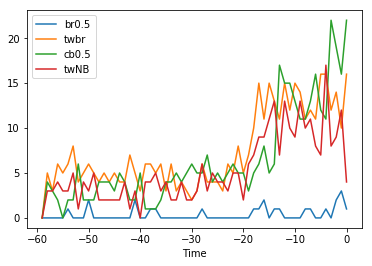

In [25]:
endbhvr = timegrp.apply(bhvrcount).sort_index(ascending=False)
endbhvr.to_csv('EndBehavior.csv')
endbhvr.plot();

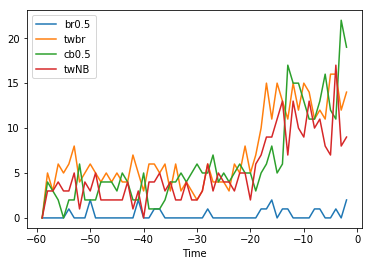

In [27]:
endbhvrLenMore2 = timegrp.filter(lambda x: x.Time.max() < -1).groupby('Time').apply(bhvrcount)
endbhvrLenMore2.to_csv('EndBehavior,gamelen more 2.csv')
endbhvrLenMore2.plot();

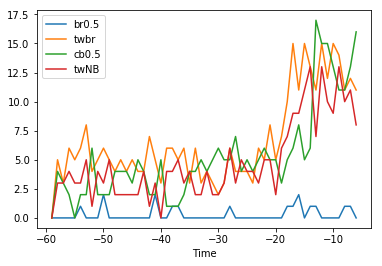

In [28]:
endbhvrLenMore6 = timegrp.filter(lambda x: x.Time.max() < -5).groupby('Time').apply(bhvrcount)
endbhvrLenMore6.to_csv('EndBehavior,gamelen more 6.csv')
endbhvrLenMore6.plot();

In [31]:
timegrp.filter(lambda x: x.Time.max() < -5).Game.unique()

NameError: name 'timegrp' is not defined

### График длин игр

In [5]:
gamelength=YHData[['Game','Time']].groupby('Game').max()

In [6]:
a=gamelength.sort_values(by='Time')

In [7]:
a['Game']=range(1,14)

In [8]:
b=a.rename(columns={'Time':'Продолжительность игр','Game':'Игра'})

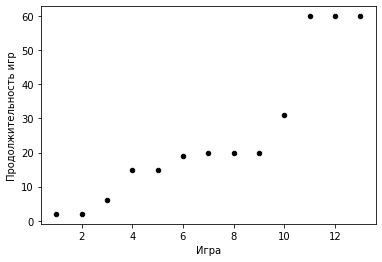

In [9]:
p=b.plot.scatter(x='Игра',y='Продолжительность игр',c='black')

In [28]:
p.get_figure().savefig('Gameslen.png',dpi=100)

In [32]:
GLData.axes

[Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556],
            dtype='int64', length=1557),
 Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
        'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
        'CalcAdviceCount', 'UseHelp', 'Util', 'iscb0', 'iscb0.5', 'iscb1',
        'Ui>U', 'Uall>U', 'Unew>U', 'Fnew>F', 'Fi>Fprev', 'Ui', 'Unew', 'U',
        'Uloc', 'Uloc>Ulocprev', 'BR1', 'BR2', 'BR3'],
       dtype='object')]

In [33]:
GLData.shape[0]

1557

## Доля КП в данных игр

In [34]:
GLGames = Games[(Games.Mechname=='gl') & (Games.GameMech=='agree') & (Games.GamersCount==3) & (Games.Parametr1_alfa==1)
               & (Games.Parametr2_beta==0.0005)]
GLData = Alldata[Alldata.Game.isin(GLGames.Game)].copy()

GLEGames = Games[(Games.Mechname=='gl') & (Games.GameMech=='exp') ]
GLEData = Alldata[Alldata.Game.isin(GLEGames.Game)]

GLData.shape

(2349, 17)

In [10]:
YHEGames = Games[(Games.Mechname=='yh') & (Games.GameMech=='exp')]
YHEData = Alldata[Alldata.Game.isin(YHEGames.Game)]

In [4]:
def calcCBCounts(games,data,dimens=1):
    counts = getCBofAllGames(data,dim=dimens)
    counts['Steps Count %'] = counts['Steps Count']/((data.shape[0])/100)#-games.shape[0])/100)
    return counts

### Доля КП в GL

In [35]:
GLCounts = calcCBCounts(GLGames,GLData,3)
GLCounts

NameError: name 'calcCBCounts' is not defined

In [10]:
GLCounts.to_clipboard()

In [36]:
GLECounts = calcCBCounts(GLEGames,GLEData,3)
GLECounts

NameError: name 'calcCBCounts' is not defined

In [37]:
GLEcmp = pd.concat([GLCounts['Steps Count %'],GLECounts['Steps Count %']],axis=1)
GLEcmp.plot()

NameError: name 'GLCounts' is not defined

In [38]:
GLEcmp.columns = ["Базовый, % КП шагов", "Эксперим., % КП шагов"]

In [38]:
plGLEcmp.plot()

NameError: name 'plGLEcmp' is not defined

In [39]:
calcCBCounts(ADMMGames,ADMMData)

NameError: name 'calcCBCounts' is not defined

In [40]:
calcCBCounts(ADMMEGames,ADMMEData)

NameError: name 'calcCBCounts' is not defined

In [41]:
calcCBCounts(GLRGames,GLRData)

NameError: name 'calcCBCounts' is not defined

### Доля КП в YH

In [11]:
print(YHData.shape,YHEData.shape)

(978, 17) (90, 17)


In [42]:
calcCBCounts(YHGames,YHData)

NameError: name 'calcCBCounts' is not defined

In [16]:
Out[12].to_clipboard()

In [43]:
calcCBCounts(YHEGames,YHEData)

NameError: name 'calcCBCounts' is not defined

In [15]:
Out[13].to_clipboard()

In [44]:
YHCB = getCBwithEps(YHData,eps=0.0)
YHCB.sort_values(by=['game','ts']).head()

,ts,te,subject,game,gamelength
30,1,3,2,40,60
82,1,3,3,40,60
83,6,8,3,40,60
31,7,9,2,40,60
32,11,12,2,40,60


In [45]:
YHCB.shape

(131, 5)

In [11]:
YHCB.to_csv("yhcb")

In [55]:
(YHCB['te']-YHCB['ts']).sum()

NameError: name 'YHCB' is not defined

In [10]:
def cbStepsCount(cbdata,sh=0):
    return (cbdata['te']-cbdata['ts']+sh).sum()

In [46]:
pd.DataFrame(data=[cbStepsCount(getCBwithEps(YHData,e),0) for e in [0,0.5,1]],
             columns=['Steps count'], index=['CB(0)','CB(0.5)','CB(1)'])

NameError: name 'cbStepsCount' is not defined

In [68]:
dcb = DataMarkedCB(YHData,YHCB)

In [35]:
%store dcb

Stored 'dcb' (DataFrame)


In [47]:
dcb.head(6)

NameError: name 'dcb' is not defined

In [48]:
dcb[dcb['iscb']>0].count()

NameError: name 'dcb' is not defined

In [49]:
dcb[dcb['iscb']<1].count()

NameError: name 'dcb' is not defined

In [50]:
YHData.columns

Index(['Game', 'Time', 'Subject', 'Group', 'GrSubject', 'Type', 'Gain',
       'Penalty', 'x', 's1', 's2', 's3', 'AcceptAdvice', 'CalcCount',
       'CalcAdviceCount', 'UseHelp', 'Util'],
      dtype='object')

In [109]:
YHData[(YHData['Game']==40) & (YHData['GrSubject']==1) & (YHData['Time']>=31) & (YHData['Time']<=34)]

,Game,Time,Subject,Group,GrSubject,Type,Gain,Penalty,x,s1,...,Unew>U,Fnew>F,Fi>Fprev,Ui,Unew,U,Uloc,Uloc>Ulocprev,g,br
92,40,31,11.0,1.0,1,1.0,1.623527,0.0325,1.742424,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001724,59.096433
95,40,32,11.0,1.0,1,1.0,5.393992,1.3000,43.809524,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671298,59.096433
98,40,33,11.0,1.0,1,1.0,5.046249,1.4400,41.071429,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,59.096433
101,40,34,11.0,1.0,1,1.0,4.935892,1.4430,39.690265,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.066595,55.016061


In [52]:
(YHCB['te']-YHCB['ts']).sum()

295

In [53]:
YHData.shape

(978, 17)

In [54]:
Counts.to_clipboard()

NameError: name 'Counts' is not defined

NameError: name 'Counts' is not defined

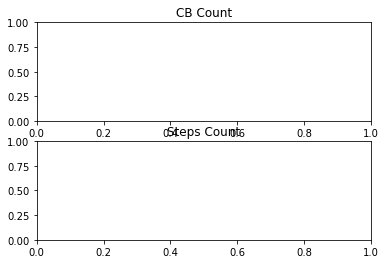

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].set_title('CB Count')
axes[1].set_title('Steps Count')
Counts['CB Count'].plot(ax=axes[0])
Counts['Steps Count'].plot(ax=axes[1])
fig.tight_layout(h_pad=0.1)
fig.savefig('CB_StepsCount.png',dpi=100)

## Для графиков числа КП и шагов в них

In [16]:
Meta={'basecount':YHData.shape[0],'expcount':YHEData.shape[0]}

### Для статьи "КП итог"

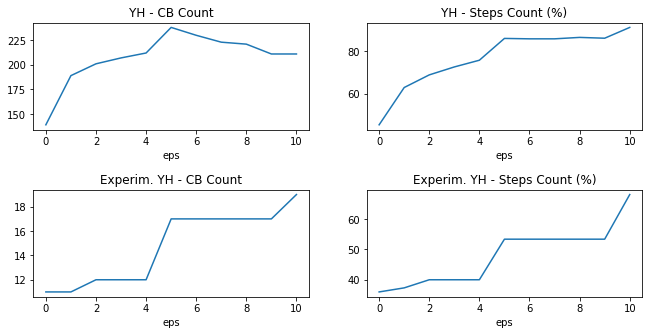

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set_title('YH - CB Count')
axes[1,0].set_title('Experim. YH - CB Count')
axes[0,1].set_title('YH - Steps Count (%)')
axes[1,1].set_title('Experim. YH - Steps Count (%)')
CountsExp['CB Count'].plot(ax=axes[1,0])
(CountsExp['Steps Count']/(Meta['expcount']/100)).plot(ax=axes[1,1])
Counts['CB Count'].plot(ax=axes[0,0])
(Counts['Steps Count']/(Meta['basecount']/100)).plot(ax=axes[0,1])
fig.tight_layout(h_pad=0.1)
fig.set_size_inches((10,5))
fig.savefig('YHE_CB_StepsCount.png',dpi=150)

### Для презентации на УБС-2018

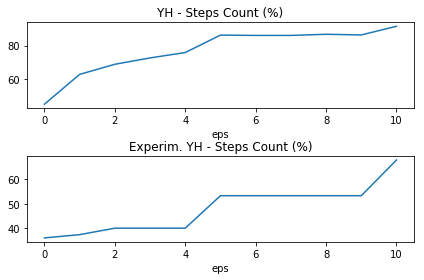

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1)
#axes[0,0].set_title('YH - CB Count')
#axes[1,0].set_title('Experim. YH - CB Count')
axes[0].set_title('YH - Steps Count (%)')
axes[1].set_title('Experim. YH - Steps Count (%)')
#CountsExp['CB Count'].plot(ax=axes[1,0])
CountsExp['Steps Count'].plot(ax=axes[1])
#Counts['CB Count'].plot(ax=axes[0,0])
Counts['Steps Count'].plot(ax=axes[0])
fig.tight_layout(h_pad=0.1)
#fig.set_size_inches((10,5))
fig.savefig('YHE_CB_StepsCount.png',dpi=150)

In [56]:
CountsExp['Steps Count']/75

NameError: name 'CountsExp' is not defined

NameError: name 'CountsExp' is not defined

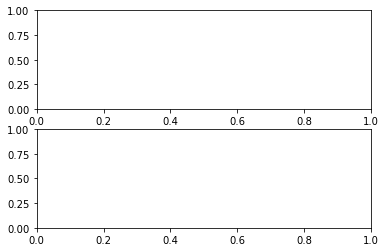

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=1)
CountsExp['CB Count'].plot(ax=axes[0])
CountsExp['Steps Count'].plot(ax=axes[1])
fig.savefig('YHE_CB_StepsCount.png',dpi=100)

In [58]:
GLData[['Time','x']].iloc[-3:]

,Time,x
6414,8,22.133333
6415,8,42.333333
6416,8,50.533333


### Распределение, эфф-е по Нэш-торгам

NashOpt - оптимальное распределение ресурсов для максимизации функции торгов Нэша $ \Pi_i (u_i(x_i)-u_i(0)) $ :

In [ ]:
NashOpt=[32.0724,39.1355,43.7921]

In [115]:
gamegroups = GLData.groupby('Game')

a = []
for g,data in gamegroups:
    data.sort_values(by=['Time','GrSubject'])
    a.append( data['x'].iloc[-3:].values )

In [59]:
a

NameError: name 'a' is not defined

In [81]:
from scipy.spatial import distance

In [62]:
npd = distance.cdist(a,[[115/3,115/3,115/3],[49,41,25],[32.0724, 39.1355, 43.7921]],'cityblock')
npd2 = distance.cdist(a,[[115/3,115/3,115/3],[49,41,25],[32.0724, 39.1355, 43.7921]],'euclidean')

[np.mean(npd,axis=0),np.mean(npd2,axis=0)]

NameError: name 'a' is not defined

In [96]:
gamegroups = YHData.groupby('Game')

In [97]:
a = []
for g,data in gamegroups:
    data.sort_values(by=['Time','GrSubject'])
    a.append( data['x'].iloc[-3:].values )

In [99]:
npd = distance.cdist(a,[[49,41,25],[22.81,115/3,53.85]],'cityblock')
npd2 = distance.cdist(a,[[49,41,25],[22.81,115/3,53.85]],'euclidean')

In [64]:
np.mean(npd,axis=0)

NameError: name 'npd' is not defined

In [63]:
np.mean(npd2,axis=0)

NameError: name 'npd2' is not defined

In [60]:
a

NameError: name 'a' is not defined

In [102]:
def f(x,r):
    import math
    return math.sqrt(r+x)-math.sqrt(r)

In [103]:
def Nf(x,r):
    return f(x[0],r[0])*f(x[1],r[1])*f(x[2],r[2])

In [65]:
Nf([22.81,115/3,53.85],[1,9,25])

NameError: name 'Nf' is not defined

In [66]:
Nf([20,40,55],[1,9,25])

NameError: name 'Nf' is not defined

In [67]:
Nf([115/3,115/3,115/3],[1,9,25])

NameError: name 'Nf' is not defined

In [68]:
22.81+115/3+53.85

114.99333333333334

In [69]:
Nf([32.0724, 39.1355, 43.7921],[1,9,25])

NameError: name 'Nf' is not defined

In [70]:
Nf([49,41,25],[1,9,25])

NameError: name 'Nf' is not defined

## Оценка распределения длин КП

In [2]:
cbs = getCBwithEps(YHData)

In [3]:
notStoppedCbs = cbs[cbs['te']!=cbs['gamelength']]

In [4]:
lengths = (notStoppedCbs['te']-notStoppedCbs['ts'])

In [61]:
lengths.values

NameError: name 'lengths' is not defined

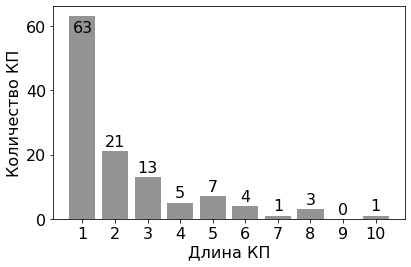

In [6]:
plt.rcParams.update({'font.size': 16})
a,b = np.histogram(lengths)

#labels = ['G1', 'G2', 'G3', 'G4', 'G5']
labels = b[0:10]
x = np.arange(len(labels))  # the label locations
width = 0.8  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x, a, width,color='xkcd:grey')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Длина КП')
ax.set_ylabel('Количество КП')
ax.set_xticks(x)
ax.set_xticklabels(b.astype(int))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    for rect in rects:
        height = rect.get_height()
        
        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.09)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
fig.tight_layout()

#plt.show()
plt.savefig("1")

In [8]:
from scipy import stats
from scipy.stats import logser
from statsmodels.base.model import GenericLikelihoodModel

In [15]:
class LogFit(GenericLikelihoodModel):
    def __init__(self, endog, exog=None, **kwds):
        if exog is None:
            exog = np.zeros_like(endog)
            
        super(LogFit, self).__init__(endog, exog, **kwds)
    
    def nloglikeobs(self, params):

        return -np.log(logser.pmf(self.endog, p=params[0]))
    
    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwds):
        if start_params is None:
            excess_zeros = 0.5 #(self.endog == 0).mean() - stats.poisson.pmf(0, lambda_start)
            
            start_params = np.array([excess_zeros])
            
        return super(LogFit, self).fit(start_params=start_params,
                                                    maxiter=maxiter, maxfun=maxfun, **kwds)

In [16]:
results = LogFit(lengths.values.tolist()).fit()

Optimization terminated successfully.
         Current function value: 1.520917
         Iterations: 14
         Function evaluations: 28


In [17]:
plog = results.params.item()

In [71]:
plog

NameError: name 'plog' is not defined

In [72]:
notStoppedCbs.shape

NameError: name 'notStoppedCbs' is not defined

In [73]:
118*(1-logser.pmf(1,plog)-logser.pmf(2,plog)-logser.pmf(3,plog)-logser.pmf(4,plog)-logser.pmf(5,plog)-logser.pmf(6,plog)) #smallclass

NameError: name 'logser' is not defined

smallclass <~ 5 then use classes 1,2,3,4,5,[6,...]

In [19]:
def myclass(a):
    if a > 4:
        return 5
    else:
        return a

In [74]:
lengths.index = lengths.values
histclasses = lengths.groupby(myclass).count()
histclasses

NameError: name 'lengths' is not defined

In [21]:
expclassesp = [logser.pmf(1,plog),logser.pmf(2,plog),logser.pmf(3,plog),logser.pmf(4,plog)]
expclassesp.append( 1 - np.sum(expclassesp) )

In [22]:
expclasses = np.multiply(118,expclassesp)

In [75]:
stats.chisquare(histclasses.values,expclasses,1)

NameError: name 'stats' is not defined

### Гипотеза падения выигрышей

In [67]:
arr = np.loadtxt('2.txt')

In [76]:
np.shape(arr)

NameError: name 'arr' is not defined

In [78]:
stats.wilcoxon(arr[0],arr[1],zero_method='wilcox')

NameError: name 'stats' is not defined

In [23]:
d=pd.DataFrame(arr[0]-arr[1])

In [25]:
d['abs']=abs(d[0])

In [30]:
dsrt = d.sort_values(by='abs')

In [39]:
dsrtnn = dsrt[dsrt['abs']>0].copy()

In [40]:
dsrtnn['rank'] = range(1,dsrtnn.shape[0]+1)

In [77]:
dsrtnn[dsrtnn[0]<0]['rank'].sum()

NameError: name 'dsrtnn' is not defined

In [79]:
(np.sign(dsrtnn[0])*dsrtnn['rank']).sum()

NameError: name 'dsrtnn' is not defined

In [52]:
from math import sqrt

In [53]:
n = 125
sigma = sqrt( n*(n+1)*(2*n+1)/6 )

In [80]:
sigma

NameError: name 'sigma' is not defined

In [81]:
sigma*1.96

NameError: name 'sigma' is not defined

In [82]:
2*(1-stats.norm.cdf(3655.0/sigma))

NameError: name 'stats' is not defined

In [83]:
stats.mannwhitneyu(arr[0],arr[1],alternative='less')

NameError: name 'stats' is not defined